### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. #
### Draw the inferences from the clusters obtained.


##### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

##### ID --Unique ID
##### Balance--Number of miles eligible for award travel
##### Qual_mile--Number of miles counted as qualifying for Topflight status
##### cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
##### cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
##### cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
##### 1 = under 5,000
##### 2 = 5,000 - 10,000
##### 3 = 10,001 - 25,000
##### 4 = 25,001 - 50,000
##### 5 = over 50,000
##### Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
##### Bonus_trans--Number of non-flight bonus transactions in the past 12 months
##### Flight_miles_12mo--Number of flight miles in the past 12 months
##### Flight_trans_12--Number of flight transactions in the past 12 months
##### Days_since_enrolled--Number of days since enrolled in flier program
##### Award--whether that person had award flight (free flight) or not

### 1. Hierarchical Clustering

In [71]:
import pandas as pd
import numpy as np


In [72]:
# Reading the dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name=1, index_col=0)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [74]:
# Looking for non-zero Qual_Miles
data.iloc[np.flatnonzero(data['Qual_miles'])]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
22,185681,2024,1,1,1,13300,16,1800,9,6896,1
25,205651,500,1,1,1,4025,21,700,4,7932,0
46,288865,967,1,1,1,23600,14,2000,4,6884,1
72,84409,5031,2,1,1,15436,16,1150,4,7766,0
103,25076,1182,5,1,1,57203,14,0,0,6750,1
...,...,...,...,...,...,...,...,...,...,...,...
3925,13004,1000,1,1,1,13890,39,0,0,1572,1
3934,55922,2273,1,1,1,8104,19,4104,16,1552,0
3976,59927,739,1,1,1,3100,3,0,0,1464,1


In [75]:
# Sorting the FLight_Miles_12mo in descending order 
data.sort_values(['Flight_miles_12mo'], ascending=False)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3606,160114,500,1,1,1,71954,86,30817,53,1373,1
2032,53232,888,4,1,1,80696,65,22100,45,3831,1
1902,147596,0,1,1,1,19175,19,16675,18,4076,1
3486,119214,0,1,1,1,19633,23,15533,17,1041,1
3617,27619,0,4,1,1,83726,68,14050,46,1325,1
...,...,...,...,...,...,...,...,...,...,...,...
1651,115197,0,3,1,1,17638,24,0,0,4820,0
1653,98604,0,3,1,1,17490,15,0,0,4919,1
1654,385195,0,1,1,1,0,0,0,0,4903,0


In [76]:
# Statistics of the data
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Data Scaling

In [150]:
from sklearn.preprocessing import MinMaxScaler

scaler_N = MinMaxScaler()
scaled_N_Data = pd.DataFrame(scaler_N.fit_transform(data), index=data.index, columns=data.columns)
scaled_N_Data.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_KMeans
ID#,,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0,0.000000
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.0,0.000000
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.0,0.000000
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.0,0.000000
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1.0,0.333333


In [151]:
type(scaled_N_Data)
scaled_N_Data.shape[1]

13

### Feature Selection

In [80]:
# Calculating VIF to check the multicollinearity [so that we can remove some of the features if they have multicollinearity]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif_values'] = [variance_inflation_factor(scaled_N_Data,i) for i in range(scaled_N_Data.shape[1]) ] 
vif['features'] = data.columns

vif

,vif_values,features
0,2.009198,Balance
1,1.066839,Qual_miles
2,6.544478,cc1_miles
3,1.043895,cc2_miles
4,1.106285,cc3_miles
5,5.912540,Bonus_miles
6,4.804540,Bonus_trans
7,4.570133,Flight_miles_12mo
8,5.135822,Flight_trans_12
9,2.654384,Days_since_enroll


### Since none of the variables has vif > 10, it is OK to put all the variables in analysis.

## Hierarchical Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# calculating silhouette scores for linkage = 'ward' and for different no. of clusters
agg_sil_score_ward = {}
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    model.fit(scaled_N_Data)
    score = silhouette_score(scaled_N_Data, model.labels_)
    agg_sil_score_ward.update({i:score})
    
agg_sil_score_ward

{2: 0.535930510919477,
 3: 0.43550164891825044,
 4: 0.42494300944261365,
 5: 0.3762586351398372,
 6: 0.33447794301195294,
 7: 0.32889569025182047,
 8: 0.3125764904816174,
 9: 0.3260265067260809}

In [82]:
agg_sil_score_single = {}
# Similarly storing scores for single linkage
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    model.fit(scaled_N_Data)
    score = silhouette_score(scaled_N_Data, model.labels_)
    agg_sil_score_single.update({i:score})
    
agg_sil_score_single

{2: 0.535930510919477,
 3: 0.5351606918177734,
 4: 0.48129679558120275,
 5: 0.48005487141025094,
 6: 0.4327930185753205,
 7: 0.4313535297638312,
 8: 0.39132817868911945,
 9: 0.39065115753519675}

## Both linkages method gives us max score at cluster=2

In [83]:
hierarchical_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
data['cluster'] = hierarchical_model.fit_predict(scaled_N_Data)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [85]:
sil_score_hier = silhouette_score(scaled_N_Data, hierarchical_model.labels_)
model_performances = {'hier':sil_score_hier.round(4)}
model_performances

{'hier': 0.5359}

In [86]:
data.groupby(['cluster']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


In [87]:
for x,y in data.groupby(['cluster']):
    print(y.head(10))
    print('-------------------------')

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
6      16420           0          1          1          1            0   
7      84914           0          3          1          1        27482   
11     40091           0          2          1          1         7278   
13     43382           0          2          1          1        11150   
14     43097           0          1          1          1         3258   
15     17648           0          1          1          1            0   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                 

In [88]:
data.groupby(['cluster']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
1,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481


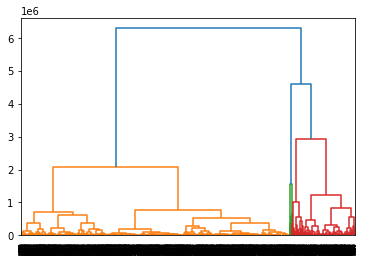

In [89]:
from scipy.cluster import hierarchy

hr = hierarchy.linkage(data, method='ward', metric='euclidean')

dn = hierarchy.dendrogram(hr)

Through Dendorgam as well, it is visible that 2 clusters are optimum as 
we can draw a horizontal line which cuts the longest vertical lines which are the blue ones.

## K-Means Clustering

In [90]:
from sklearn.cluster import KMeans

wcss_all = {}
score_all = {}

# Storing scores and wcss values for different np. of clusters

for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_N_Data)
    wcss = model.inertia_
    score = silhouette_score(scaled_N_Data, model.labels_)
    wcss_all.update({i:wcss})
    score_all.update({i:score})


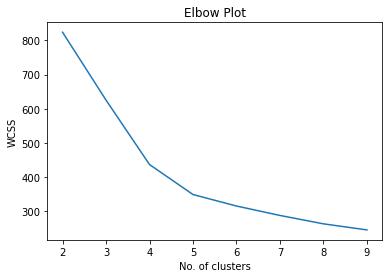

In [91]:
from matplotlib import pyplot as plt

#plt.plot(range(2,11), ([i[1]] for i in wcss))
plt.plot(range(2,10), wcss_all.values())

plt.title('Elbow Plot')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()


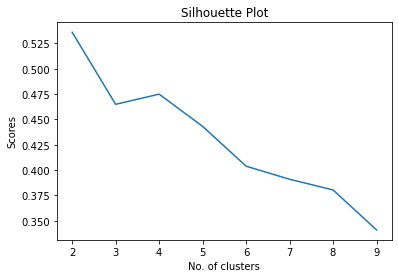

In [92]:
from matplotlib import pyplot as plt

#plt.plot(range(2,11), ([i[1]] for i in wcss))
plt.plot(range(2,10), score_all.values())

plt.title('Silhouette Plot')
plt.xlabel('No. of clusters')
plt.ylabel('Scores')
plt.show()


In [93]:
wcss_all

{2: 823.6756984125207,
 3: 625.168488157072,
 4: 436.70885761932624,
 5: 348.94332172541374,
 6: 315.3155964842891,
 7: 287.7310054422425,
 8: 263.2132188914899,
 9: 245.4061707045836}

In [94]:
score_all

{2: 0.535930510919477,
 3: 0.46484529388583046,
 4: 0.47483765255961,
 5: 0.4430672072796034,
 6: 0.4037918219414183,
 7: 0.3908766971669341,
 8: 0.3803501626148992,
 9: 0.3408995682160413}

## As per the elbow plot, no. of clusters = 4 is optimum 

In [95]:
K_Means_model = KMeans(n_clusters=4, random_state=42)
data['cluster_KMeans'] = K_Means_model.fit_predict(scaled_N_Data)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_KMeans
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [96]:
model_performances.update({'KMeans':silhouette_score(scaled_N_Data, K_Means_model.labels_)})
model_performances

{'hier': 0.5359, 'KMeans': 0.47483765255961}

In [97]:
for x,y in data.groupby(['cluster_KMeans']):
    print(y.head())
    print('---------------')

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
6      16420           0          1          1          1            0   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
6              0               

In [98]:
data.groupby(['cluster_KMeans']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
cluster_KMeans,,,,,,,,,,,,
0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1.0
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.0
3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0,0.0


## Inferences:

Cluster 0 & 2: Passengers in this cluster use credit cards less for flight transactions. Hence did not get any award flight too. That means they are non-flight users. They often use credit cards on bonus transactions and aquires bonus miles. Passengers in cluster 2 use cc1 more frequently than other 2 credit cards cc2 and cc3. 

Cluster 1 and 3: Passengers in these two clusters use credit cards for flight more than the above two cluster passengers. They got a award flight too. Passengers in cluster 1 are the most frequent flyers amongst all (3.15). But they are also using credit cards more often for bonus transactions than their flight transactions. And passengers in cluster 3 uses cc1 more than the other two credit cards and are the frequent cc1 users amngst all (3.91 miles).

### DBSCAN clustering

In [99]:
from sklearn.cluster import DBSCAN

data.head()
scaled_N_Data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


In [154]:
# choosing minPts=22, double the size of parameters.

model_dbscan = DBSCAN(eps=0.8, min_samples=22)
model_dbscan.fit_predict(scaled_N_Data)
model_dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [155]:
print(np.unique(model_dbscan.labels_))
score_dbscan = silhouette_score(scaled_N_Data, model_dbscan.labels_)
print(score_dbscan)

[-1  0  1  2]
0.6533174036963955


In [156]:
# Now implementing combinations of different values of epsilon and minimum samples and calculating and 
# storing the silhoette scores.

from collections import Counter

eps_space = [0.5, 0.8, 1.0]
minPt_space = [15, 18, 22, 25]

dbscan_clusters = pd.DataFrame(columns=['eps', 'minPts','n_clusters','score','cluster_count'])

for eps in eps_space:
    for minPt in minPt_space:
        #print(eps, minPt)
        dbscan_grid = DBSCAN(eps=eps, min_samples=minPt)
        
        clusters = dbscan_grid.fit_predict(scaled_N_Data)
        
        cluster_count = Counter(clusters)
        
        n_clusters = np.unique(clusters).size
        
        score = silhouette_score(scaled_N_Data, clusters)
        
        dbscan_clusters.loc[len(dbscan_clusters)] = [eps,minPt,n_clusters,score,cluster_count]
               

dbscan_clusters

,eps,minPts,n_clusters,score,cluster_count
0,0.5,15,5,0.488591,"{0: 1870, 1: 1449, 2: 616, -1: 48, 3: 16}"
1,0.5,18,4,0.631235,"{0: 1870, 1: 1448, 2: 616, -1: 65}"
2,0.5,22,4,0.631235,"{0: 1870, 1: 1448, 2: 616, -1: 65}"
3,0.5,25,4,0.631235,"{0: 1870, 1: 1448, 2: 616, -1: 65}"
4,0.8,15,3,0.656184,"{0: 1897, 1: 1481, 2: 621}"
5,0.8,18,4,0.653317,"{0: 1897, 1: 1480, 2: 621, -1: 1}"
6,0.8,22,4,0.653317,"{0: 1897, 1: 1480, 2: 621, -1: 1}"
7,0.8,25,4,0.653317,"{0: 1897, 1: 1480, 2: 621, -1: 1}"
8,1.0,15,3,0.656184,"{0: 1897, 1: 1481, 2: 621}"
9,1.0,18,3,0.656184,"{0: 1897, 1: 1481, 2: 621}"


### So the best combination could be any of the rows from 4 to 11..As score and no. of data counts per each cluster is same. Ony one outlier is collaborated in cluster 2 with eps:1.0

In [158]:
model_performances.update({'DBScan': score_dbscan})

model_performances


{'hier': 0.5359, 'KMeans': 0.47483765255961, 'DBScan': 0.6533174036963955}

### It shows the best out of three models is DBScan model